# usa.gov data from bit.ly
###### (read file description in 'Python for Data Analysis - Wes McKinney')

## Loading json files

In [59]:
import json
path = 'pydata-book/datasets/bitly_usagov/example.txt'
usa_json = open(path) # open json formatted file 
usa_entries = [json.loads(line) for line in usa_json] # convert each line into a dictionary

usa_entries[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones in Pure Python

In [60]:
time_zones = [entry['tz'] for entry in usa_entries if 'tz' in entry] # get all entries with a 'tz' attribute
time_zones[:15]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [61]:
def count_time_zones(sequence): 
    counts = {} 
    for tz in sequence: 
        counts[tz] = 1 if tz not in counts else counts[tz] + 1
    return counts

counts = count_time_zones(time_zones)
print(f"Websites from Africa/Ceuta: {counts['Africa/Ceuta']}")

Websites from Africa/Ceuta: 2


## Counting Time Zones with pandas

In [62]:
from pandas import DataFrame, Series
import pandas as pd 

In [63]:
usa_df = DataFrame(usa_entries) # create a DataFrame from the list of dictionaries
usa_df[10:20]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
10,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...,US,1.0,America/Los_Angeles,WA,vNJS4H,u0uD9q,o_4us71ccioa,"en-us,en;q=0.5",1.usa.gov,direct,https://www.nysdot.gov/rexdesign/design/commun...,1.331923e+09,1.319564e+09,Seattle,"[47.5951, -122.332603]",NaN,NaN
11,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...,US,0.0,America/New_York,DC,wG7OIH,A0nRz4,darrellissa,"en-us,en;q=0.5",1.usa.gov,http://t.co/ND7SoPyo,http://oversight.house.gov/wp-content/uploads/...,1.331923e+09,1.331816e+09,Washington,"[38.937599, -77.092796]",NaN,NaN
12,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...,US,1.0,America/New_York,VA,vNJS4H,u0uD9q,o_4us71ccioa,"en-us,en;q=0.5",1.usa.gov,direct,https://www.nysdot.gov/rexdesign/design/commun...,1.331923e+09,1.319564e+09,Alexandria,"[38.790901, -77.094704]",NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
14,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,US,1.0,America/New_York,GA,2rOUYc,2rOUYc,bitly,"en-us,en;q=0.5",1.usa.gov,direct,http://toxtown.nlm.nih.gov/index.php,1.331923e+09,1.255770e+09,Marietta,"[33.953201, -84.5177]",NaN,NaN
15,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...,HK,1.0,Asia/Hong_Kong,00,nQvgJp,rtrrth,walkeryuen,"zh-TW,zh;q=0.8,en-US;q=0.6,en;q=0.4",j.mp,http://forum2.hkgolden.com/view.aspx?type=BW&m...,http://www.ssd.noaa.gov/PS/TROP/TCFP/data/curr...,1.331923e+09,1.317318e+09,Central District,"[22.2833, 114.150002]",NaN,NaN
16,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...,HK,1.0,Asia/Hong_Kong,00,XdUNr,qWkgbq,walkeryuen,"zh-TW,zh;q=0.8,en-US;q=0.6,en;q=0.4",j.mp,http://forum2.hkgolden.com/view.aspx?type=BW&m...,http://www.usno.navy.mil/NOOC/nmfc-ph/RSS/jtwc...,1.331923e+09,1.317318e+09,Central District,"[22.2833, 114.150002]",NaN,NaN
17,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.5; r...,US,0.0,America/New_York,ME,zH1BFf,x3jOIv,andyzieminski,"en-us,en;q=0.5",1.usa.gov,http://t.co/6Cx4ROLs,http://www.usda.gov/wps/portal/usda/usdahome?c...,1.331923e+09,1.331840e+09,Buckfield,"[44.299702, -70.369797]",NaN,NaN
18,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,1.usa.gov,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
19,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,IT,0.0,Europe/Rome,20,wcndER,zkpJBR,bnjacobs,"it-IT,it;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Venice,"[45.438599, 12.3267]",NaN,NaN


In [64]:
tz_counts = usa_df['tz'].value_counts() # returns # of unique instances for each value of 'tz; returns Series 
tz_counts

# NOTE: This version doesn't count the missing or na values 

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
Europe/Sofia                    1
America/Mazatlan                1
America/Argentina/Mendoza       1
America/Tegucigalpa             1
Europe/Volgograd                1
Name: tz, Length: 97, dtype: int64

## Counting missing/unknown values

In [65]:
clean_tz = usa_df['tz'].fillna('Missing') # replace na values
clean_tz[clean_tz == ''] = 'Unknown' # fill empty strings with unknown 
tz_counts = clean_tz.value_counts() # returns # of unique instances for each value of 'tz' 

print(f"Missing: {tz_counts['Missing']}")
print(f"Unknown: {tz_counts['Unknown']}")

Missing: 120
Unknown: 521


## Plotting a graph

<AxesSubplot:>

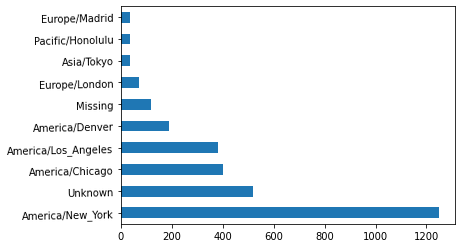

In [66]:
tz_counts[:10].plot(kind='barh', rot=1)

### Finding the browser, device, or application used in shortening URLS

In [67]:
usa_non_null = usa_df.a.dropna() # get entries with non-null values for 'a' 
devices = [x.split()[0] for x in usa_non_null] # get the devices
devices = Series(devices) # create a Series

devices[:8]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
dtype: object

### Making problems <i>binary<i>

#### Here we'll classify devices as <i>Windows</i> or <i> Not Windows </i>

In [68]:
import numpy as np

cframe = usa_df[usa_df.a.notnull()] # Find subset of dataframe with non-null 'a' values
windows_or_not = cframe['a'].str.contains('Windows') # Returns array of 1s and 0s; 1 = Windows, 0 = Not Windows
operating_system = np.where(windows_or_not, 'Windows', 'Not Windows') 
print(operating_system[:5])

['Windows' 'Not Windows' 'Windows' 'Not Windows' 'Windows']


In [69]:
cframe['a'].str.contains('Windows') # Return an array where the condition is true

0        True
1       False
2        True
3       False
4        True
        ...  
3555     True
3556     True
3557    False
3558    False
3559     True
Name: a, Length: 3440, dtype: bool

### Grouping data

In [70]:
by_tz_os = cframe.groupby(['tz', operating_system]) # groups elements by timezone, and OS
tz_agg = by_tz_os.size() # returns an aggregate of each timezone
tz_agg_counts = tz_agg.unstack() # find counts for each timezone 
tz_agg_counts = tz_agg_counts.fillna(0) # fill empty cells with 0
tz_agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


### Selecting overall timezones

In [71]:
indexer = tz_agg_counts.sum(1).argsort() # returns total number of timezones in sorted order
indexer[:10]


tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

## Getting proportion of Windows vs. Non-Windows users for each timezone

<AxesSubplot:ylabel='tz'>

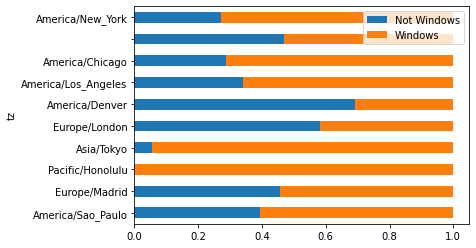

In [72]:
count_subset = tz_agg_counts.take(indexer)[-10:]
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

# MovieLens 1M Data Set


## Loading tables

In [73]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./pydata-book/datasets/movielens/users.dat', sep='::', header=None, 
names=unames, engine='python')

users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [74]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./pydata-book/datasets/movielens/ratings.dat', sep='::', header=None,
names=rnames, engine='python')

ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [75]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./pydata-book/datasets/movielens/movies.dat', sep='::', header=None, 
names=mnames, engine='python')

movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Merging tables together

In [76]:
data = pd.merge(pd.merge(ratings, movies), users)
data[:5]

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [77]:
data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
Name: 0, dtype: object

## Aggregating movie ratings, grouped by gender

### Create spreadsheet stype pivot table

In [78]:
mean_ratings = pd.pivot_table(data, values='rating', index='title', columns='gender', 
aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


## Number of ratings per title

In [79]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

## Counting the number of <i> active titles </i>
##### NOTE: <i>active title</i>, in this case, means the movie received more than 250 ratings

In [80]:
# returns an Index object of movies that have more than 250 ratings
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [81]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


## Finding Top movies among females

In [82]:
# sort the DataFrame by values in the 'F' column, in descending order
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False) 
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


## Measuring rating disagreement

#### NOTE: <i>rating disagreement</i> means the difference between how men rated the movie, vs how women rated the movie

In [83]:
# calculate the difference between the average rating of men and women for each movie in 
# the DataFrame
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'] 
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


## Measure ratings by standard deviation

In [84]:
rating_std_by_title = data.groupby('title')['rating'].std() # get standard deviation of ratings
rating_std_by_title = rating_std_by_title.loc[active_titles] # filter s.d. for active titles
rating_std_by_title.sort_values(ascending=False)[:10] # get the top 10 largest s.d. 

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# US Baby Names 1880-2010

In [85]:
bnames=['name', 'gender', 'occurences']
baby21 = pd.read_table('pydata-book/datasets/babynames/yob2021.txt', sep=',', 
names=bnames, engine='python') # get baby names from 2001 

baby21[:10]

,name,gender,occurences
0,Olivia,F,17728
1,Emma,F,15433
2,Charlotte,F,13285
3,Amelia,F,12952
4,Ava,F,12759
5,Sophia,F,12496
6,Isabella,F,11201
7,Mia,F,11096
8,Evelyn,F,9434
9,Harper,F,8388


## Reading data with Script

In [86]:
!head -n 10 pydata-book/datasets/babynames/yob2021.txt

Olivia,F,17728
Emma,F,15433
Charlotte,F,13285
Amelia,F,12952
Ava,F,12759
Sophia,F,12496
Isabella,F,11201
Mia,F,11096
Evelyn,F,9434
Harper,F,8388


## Calculating Total births 

In [87]:
baby21.groupby('gender')['occurences'].sum() # count number of male/female births in 2021

gender
F    1627098
M    1734277
Name: occurences, dtype: int64

## Read all the data from all the years

In [88]:
years = range(1880, 2021)
 
pieces = []
columns = ['name', 'gender', 'occurences']

for year in years: 
    path = f'pydata-book/datasets/babynames/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

pieces[10]

,name,gender,occurences,year
0,Mary,F,12078,1890
1,Anna,F,5233,1890
2,Elizabeth,F,3112,1890
3,Margaret,F,3100,1890
4,Emma,F,2980,1890
...,...,...,...,...
2690,Whitfield,M,5,1890
2691,Wilhelm,M,5,1890
2692,Woodfin,M,5,1890
2693,Woodie,M,5,1890


## Find trends in births over the years

In [89]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,gender,occurences,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2021239,Zykell,M,5,2020
2021240,Zylus,M,5,2020
2021241,Zymari,M,5,2020
2021242,Zyn,M,5,2020


### Plot the trends

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

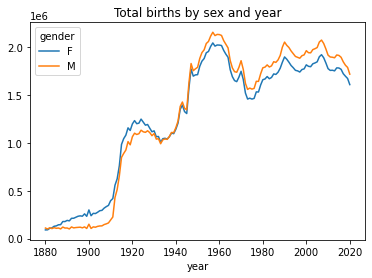

In [90]:
total_births = pd.pivot_table(names, values='occurences', index='year', columns='gender', aggfunc=sum)
total_births.plot(title='Total births by sex and year')

## Analyzing Naming trends

### Finding the proportion of each name

In [91]:
def add_prop(group): 
    # Integer division floors 
    occurences = group.occurences.astype(float)

    group['prop'] = occurences / occurences.sum()
    return group 
names = names.groupby(['year', 'gender']).apply(add_prop)
names[:10]

,name,gender,occurences,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


#### Confirm that we calculated proportions column correctly 

In [92]:
np.allclose(names.groupby(['year', 'gender']).prop.sum(), 1)

True

### Get the top 100 names for each gender/year combination

In [120]:
def getTop1000(group):     
    return group.sort_values(by='occurences', ascending=False)[:1000]

grouped = names.groupby(['year', 'gender'])
top1000 = grouped.apply(getTop1000)
top1000

name gender  occurences  year      prop
year gender                                                      
1880 F      0             Mary      F        7065  1880  0.077642
            1             Anna      F        2604  1880  0.028617
            2             Emma      F        2003  1880  0.022012
            3        Elizabeth      F        1939  1880  0.021309
            4           Minnie      F        1746  1880  0.019188
...                        ...    ...         ...   ...       ...
2020 M      2008234    Jericho      M         213  2020  0.000124
            2008233     Harris      M         213  2020  0.000124
            2008235    Rogelio      M         212  2020  0.000123
            2008236     Jerome      M         211  2020  0.000123
            2008237      Karim      M         211  2020  0.000123

[281876 rows x 5 columns]

### Analyzing trends in baby names

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

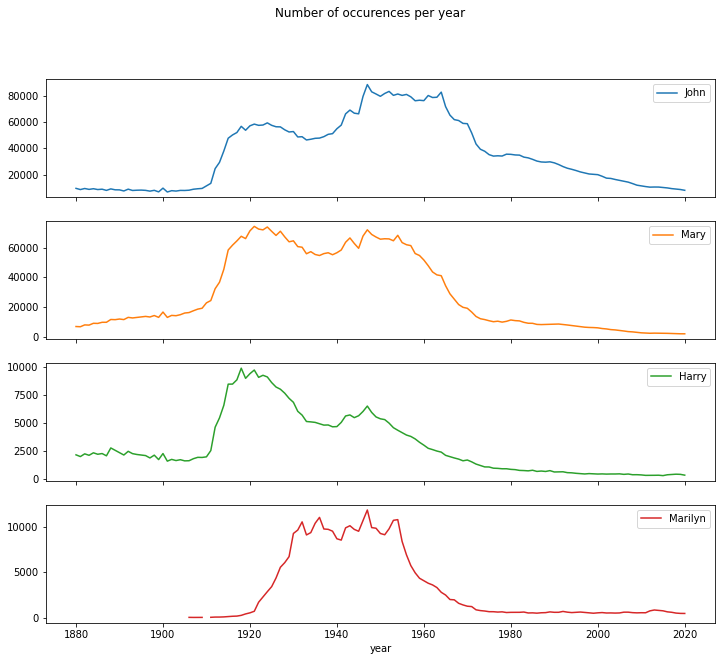

In [122]:
singleIndex = top1000.droplevel('year') # top1000 is mutliindex; drop the 'year' index level

total_births = pd.pivot_table(singleIndex, values='occurences', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Mary', 'Harry', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of occurences per year')

### Measuring the increase in naming diversity

##### NOTE: Notice that the frequency of these names reduces with each year; either 1) less people are being born each year, or 2) naming diversity increased each year. Let's explore the latter

<AxesSubplot:title={'center':'Sum of table1000.prop by year and gender'}, xlabel='year'>

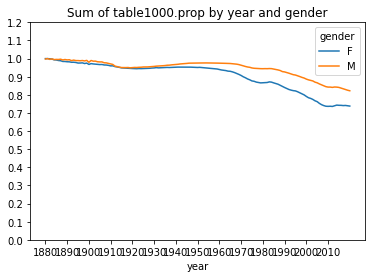

In [128]:
singleIndex = top1000.droplevel('year').drop('gender', axis=1)

table = pd.pivot_table(singleIndex, values='prop', index='year', columns='gender', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and gender', 
yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

### Calculating cumulative sum

In [165]:
# Filter the boys names from 2020
boys = names[names.gender == 'M']
boys2020 = boys[boys.year == 2020]

# Calculate the cumulative sum of the proportion of the most popular names
prop_cumsum = boys2020.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum 


2007238    0.011510
2007239    0.022198
2007240    0.030482
2007241    0.038127
2007242    0.045467
             ...   
2019886    0.999988
2019885    0.999991
2019884    0.999994
2019883    0.999997
2021243    1.000000
Name: prop, Length: 14006, dtype: float64

#### Calculate the number of unique names that make of 50% of all boys names 

In [169]:
prop_cumsum.searchsorted(0.5) + 1 # .searchsorted() returns the index

163